# **Broadcasting**

In NumPy, broadcasting is a mean of **vectorising ops** and thereby removing slow Python loops. Broadcasting is simply a set of rules for applying binary `ufuncs` (e.g. addition, subtraction, multiplication, etc.) **on arrays of different sizes**.

## **Introducing broadcasting**

For arrays of the same size, binary ops are performed on an element-by-element basis

In [2]:
import numpy as np

In [3]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes - for example adding a scalar (a 0-dimensional array) to an array

In [4]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value `5` into the array `[5, 5, 5]` and adds the results. The advantage of NumPy broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array.

In [8]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [9]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one dimensional array `a` is stretched, or broadcast across the second dimension in order to match the shape of `M`. While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [31]:
a = np.arange(3)
b = np.arange(3).reshape((3, 1))

In [32]:
a

array([0, 1, 2])

In [33]:
b

array([[0],
       [1],
       [2]])

In [20]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before, we stretched or broadcasted one value to match the shape of the other. Here we've stretched *both* `a` and `b` to match a common shape, and the result is a two-dimensional array!

<img src="img/broadcast-array.png" style="width:500px;height:400px;">
    

The light boxes represent the broadcast values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

## **Rules of broadcasting**

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:
- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with the fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### **Broadcasting example 1**

Let's look at adding a two-dimensional array to a one-dimensional array:

In [27]:
M = np.ones((2, 3))
a = np.arange(3)

In [28]:
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [29]:
a

array([0, 1, 2])

Let's consider an op on these two arrays. The shapes of the arrays are
- M.shape = (2, 3)
- a.shape = (3,)

We see by rule 1 that `a` has fewer dimensions, so we pad **its shape** on the left with ones:
- M.shape -> (2, 3)
- a.shape -> (1,3)

By rule 2, we now see that the first dimension disagrees, so we **stretch this dimension** to match:
- M.shape -> (2, 3)
- a.shape -> (2, 3)

The shapes match then, and we see that the final shape will be (2, 3):

In [30]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### **Broadcasting example 2**

Let's take a look at an example where both arrays need to be broadcast:

In [34]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [35]:
a

array([[0],
       [1],
       [2]])

In [36]:
b

array([0, 1, 2])

Again, we'll start by writing out the shapes of the arrays:
- a.shape = (3, 1)
- b.shape = (3,)

Rule 1 says that we must **pad the shape of `b`** with `1`:
- a.shape -> (3, 1)
- b.shape -> (1, 3)

Rule 2 says that we must **upgrade each of the `1`** of both arrays to match the corresponding size of the other array:
- a.shape -> (3, 3)
- b.shape -> (3, 3)

Because the result matches, these shapes are compatible. We can see this here:

In [37]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### **Broadcasting example 3**

Now let's take a look at an example in which the two arrays are not compatible:

In [38]:
M = np.ones((3, 2))
a = np.arange(3)

In [39]:
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [40]:
a

array([0, 1, 2])

This is just a slightly different situation than in the first example: the matrix `M` is transposed. How does this affect the calculation ? The shape of the arrays are 
- M.shape = (3, 2)
- a.shape = (3,)

Again, rule 1 tells us that we must **pad the shape of `a`** with ones:
- M.shape -> (3, 2)
- a.shape -> (1, 3)

By rule 2, the first dimension of `a` is stretched to match that of `M`:
- M.shape -> (3, 2)
- a.shape -> (3, 3)

Now we hit rule 3 - the final shapes do not match, so these arrays are incompatible, as we can observe by attempting this operation:

In [41]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Note the potential confusion here: you could imagine `a` and `M` compatible by padding `a` shape with ones on the right rather than on the left. But this is not how broadcasting rules work! That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array (using `np.newaxis`).

In [42]:
a[:, np.newaxis].shape

(3, 1)

In [43]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

Also note that while we've been focusing on the `+` operator here, these broadcasting rules apply to *any* binary `ufunc`. For example, here is the `logaddexp(a, b)` function, which computes `log(exp(a) + exp(b))` with more precision than the naive approach:

In [44]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## **Broadcasting in practice**

We'll now take a look at examples where broadcasting ops may be useful.

### **Centering an array**

`ufunc`s allow a NumPy user to remove the need to write slow Python loops. Broadcasting extends this ability. One common example is centering an array of data. Imagine that you have an array of 10 observations, each of which consists of 3 values. Using the standard convention, we'll store this in a `10*3` array:

In [48]:
X = np.random.random((10,3))
X

array([[0.29847431, 0.03397045, 0.1675035 ],
       [0.55778792, 0.28011893, 0.93670019],
       [0.09351166, 0.78491466, 0.33911991],
       [0.72387173, 0.52905176, 0.89376664],
       [0.94759584, 0.99138359, 0.36769007],
       [0.25523003, 0.09133683, 0.63431371],
       [0.68741668, 0.18864808, 0.4190478 ],
       [0.85831013, 0.32986121, 0.25730015],
       [0.98010224, 0.45538433, 0.57782314],
       [0.44456841, 0.24191815, 0.65161778]])

We can compute the mean of each feature using the mean aggregate across the first dimension:

In [50]:
X_mean = X.mean(0)
X_mean

array([0.58468689, 0.3926588 , 0.52448829])

And now we can center `X` by subtracting its mean (this is a broadcasting op):

In [68]:
X_centered = X - X_mean
X_centered

To double-check that we've done this correctly, we can check that the centered array has near-`0` mean:

In [70]:
X_centered.mean(0)

array([ 0.00000000e+00, -2.22044605e-17,  5.55111512e-17])

To within machine precision, the mean is now `0`

### **Plotting a two-dimensional function**

One place that broadcasting is very useful is in displaying images based on two-dimensional functions. If we want to define a function $z=f(x,y)$, broadcasting can be used to compute the functino across the grid:

In [79]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We'll use Matplotlib to plot this two-dimensional array

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

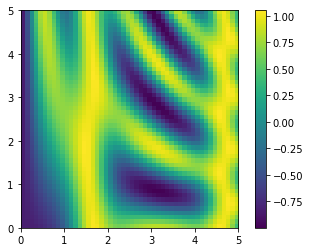

In [81]:
plt.imshow(z, origin="lower", extent=[0, 5, 0, 5], cmap="viridis")
plt.colorbar();

The result is a compelling visualisation of the two-dimensional function.